# Atari breakout Environment analysis
-------------------------------------------------------------------------------------------------------------------
In this notebook, I perform preliminary analysis of the Atari-Breakout Environment of OpenAI-gym. This analysis will help in creating the RL agent for this game.

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Load the environment here 

In [54]:
# some constants for the notebook:
fig_size = (15, 10)
alpha = 0.7

In [2]:
env = gym.make("Breakout-v0")

Let's see the observations obtained from the environment

In [3]:
ins_obs = env.reset()

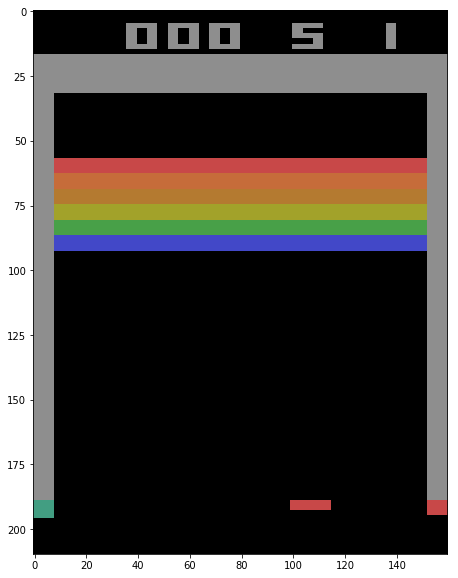

In [13]:
plt.figure(figsize=fig_size)
plt.imshow(ins_obs);  # supress the return type

In [9]:
ins_obs.shape

(210, 160, 3)

The observation is an image of raw pixels => [210, 160, 30]

We can now take a look at the actions that we can take for this environment

In [10]:
env.action_space

Discrete(4)

So, there are four discrete actions that can be taken in the game. But wait. Aren't there only two possible things that we can do? i.e. Left and Right? Let's see what the four actions correspond to.

In [11]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

Alright. This clears up quite a lot. The two questionable actions are => "NOOP" and "FIRE". This makes sense. "NOOP" is a useless action (perhaps some unused button on the JoyStick) and "FIRE" works for some time upon hitting a special brick. Hmmm ... well I am getting so nostalgic doing this :D. Man! those Video Game days ...

### Preprocessing the input observations

Some parts of the image are non required. For example the score bar above. We should be able to ignore it

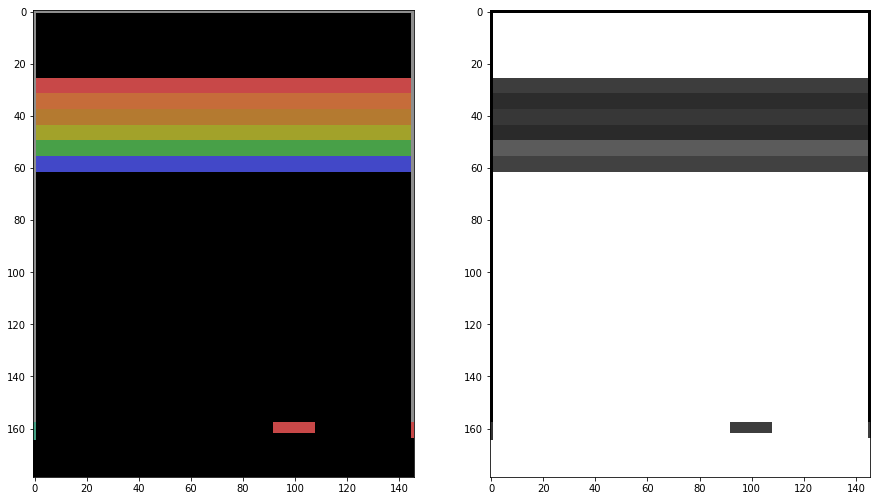

In [29]:
# cropping the observation
cropped_ins_obs = ins_obs[31:, 7: -7, :]
plt.figure(figsize=fig_size)
plt.subplot(121)
plt.imshow(cropped_ins_obs);

# removing the colour from the observation
bnw_ins_obs = cropped_ins_obs.mean(axis=-1)
plt.subplot(122)
plt.imshow(bnw_ins_obs, cmap="Greys");

In [41]:
# putting together all the preprocessing steps:
def preprocess_observation(obs):
    # crop the observation
    crop = obs[31:, 7: -7, :]
    
    # make it black and white
    bnw = crop.mean(axis=-1)
    
    # normalize the images
    nor = bnw / 255
    
    return nor

Now, that non required information has been stripped away from the images, there is still one probelm that we have to take into consideration. 
<br> => <b> Just by looking at one frame, we cannot determine where the ball / pad is going. </b>
<br> I can think of two solutions for this problem. One is to concatenate <b> past n </b> frames together and feed them to the network. Other solution is (the one that I will use) is to use only two consecutive frames and subtract them to obtain the current state.

The following cells demonstrate this process

In [31]:
# go 7 steps into the game
for _ in range(7):
    _, _, _, _ = env.step(env.action_space.sample())

In [32]:
obs1, _, _, _ = env.step(env.action_space.sample())
obs2, _, _, _ = env.step(env.action_space.sample())

In [42]:
pre_obs1 = preprocess_observation(obs1)
pre_obs2 = preprocess_observation(obs2)

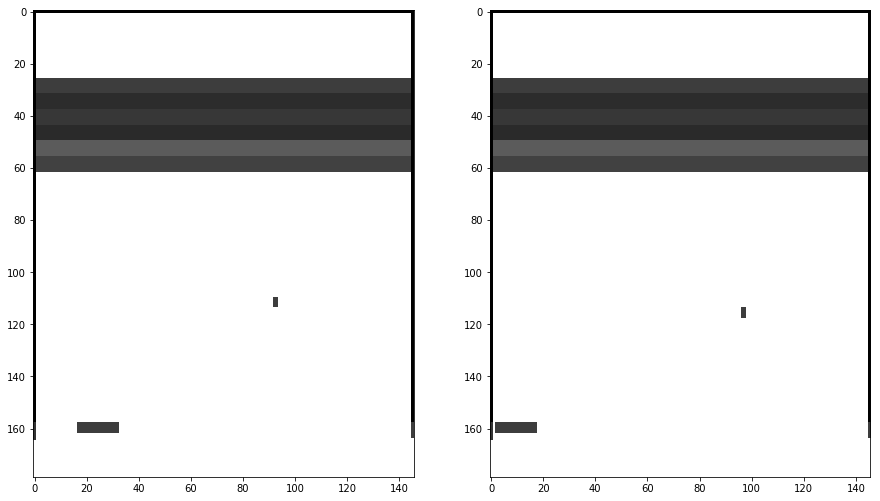

In [43]:
# plot the two observations (after preprocessing) side by side
plt.figure(figsize=fig_size)

plt.subplot(121)
plt.imshow(pre_obs1, cmap="Greys");

plt.subplot(122)
plt.imshow(pre_obs2, cmap="Greys");

In [56]:
# creating the state (input to the network)
inp_to_net = (alpha * pre_obs1) - pre_obs2

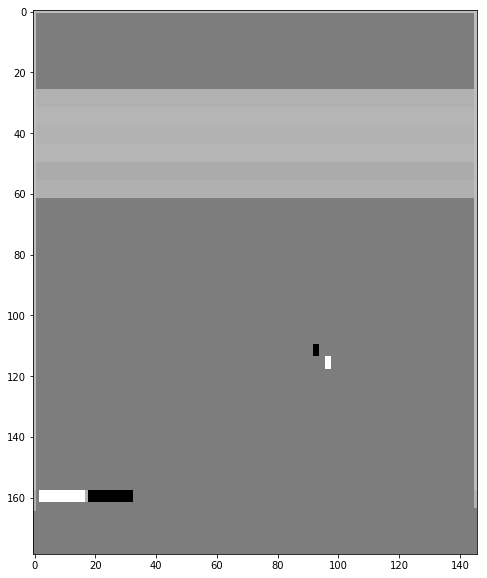

In [57]:
# plot the input to the network
plt.figure(figsize=fig_size)
plt.imshow(inp_to_net, cmap="Greys");

# This concludes the analysis of the environment